In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb


from path_setup import setup_paths
setup_paths()

In [2]:
from dataset_transformer import BaseDatasetTransform
from base_model_train import BaseModelTrain
from model_evaluator import ModelEvaluator

In [3]:
df = pd.read_excel('../datasets/splat.xlsx')

In [4]:
from intelligence_tools import AnalyzeVariables

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17935 entries, 0 to 17934
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PrimaryItemID     17588 non-null  float64
 1   PrimaryItemCode   17935 non-null  int64  
 2   Article           3978 non-null   object 
 3   PrimaryItemName   17935 non-null  object 
 4   Поставщик         824 non-null    object 
 5   Бренд             824 non-null    object 
 6   ManufacturerName  10280 non-null  object 
 7   BrandName         8897 non-null   object 
 8   SubBrandName      6271 non-null   object 
 9   SegmentName       17490 non-null  object 
 10  CategoryName      13038 non-null  object 
 11  SubCategoryName   6659 non-null   object 
 12  ProductTypeName   0 non-null      float64
 13  AgeSegmentName    2084 non-null   object 
 14  Weight            2412 non-null   float64
 15  Volume            3768 non-null   float64
 16  Quantity          3799 non-null   float6

In [10]:
df.head()

,PrimaryItemID,PrimaryItemCode,Article,PrimaryItemName,Поставщик,Бренд,ManufacturerName,BrandName,SubBrandName,SegmentName,CategoryName,SubCategoryName,ProductTypeName,AgeSegmentName,Weight,Volume,Quantity
0,394690.0,13879,NaN,З/П РОМАШКИН ЛУГ УГОЛЬ СЕРЕБРО 100МЛ,NaN,NaN,NaN,NaN,NaN,Oral care,Зубная паста,NaN,NaN,Для детей,NaN,NaN,NaN
1,394674.0,13862,NaN,З/П РОМАШКИН ЛУГ ЦЕЛЕБНЫЕ ТРАВЫ 100МЛ,NaN,NaN,NaN,NaN,NaN,Oral care,Зубная паста,NaN,NaN,Для детей,NaN,NaN,NaN
2,399746.0,13869,NaN,З/Щ SILCAMED СРЕД ТРОЙНОЕ ДЕЙСТВИЕ,NaN,NaN,DENTAL KOSMETIK,SILCAMED,NaN,Oral care,Зубные щетки,Мануальные,NaN,NaN,NaN,NaN,NaN
3,399997.0,14417,NaN,БОС ЖИДКИЙ1200МЛ.ОТБ ЖМС,NaN,NaN,AIST/SPB,NaN,NaN,Home care,LAUNDRY,NaN,NaN,NaN,NaN,NaN,NaN
4,383853.0,7765,NaN,&.АМП.Бумага для выпечки 6м,NaN,NaN,NaN,NaN,NaN,Home care,OTHERS,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
av = AnalyzeVariables(df)

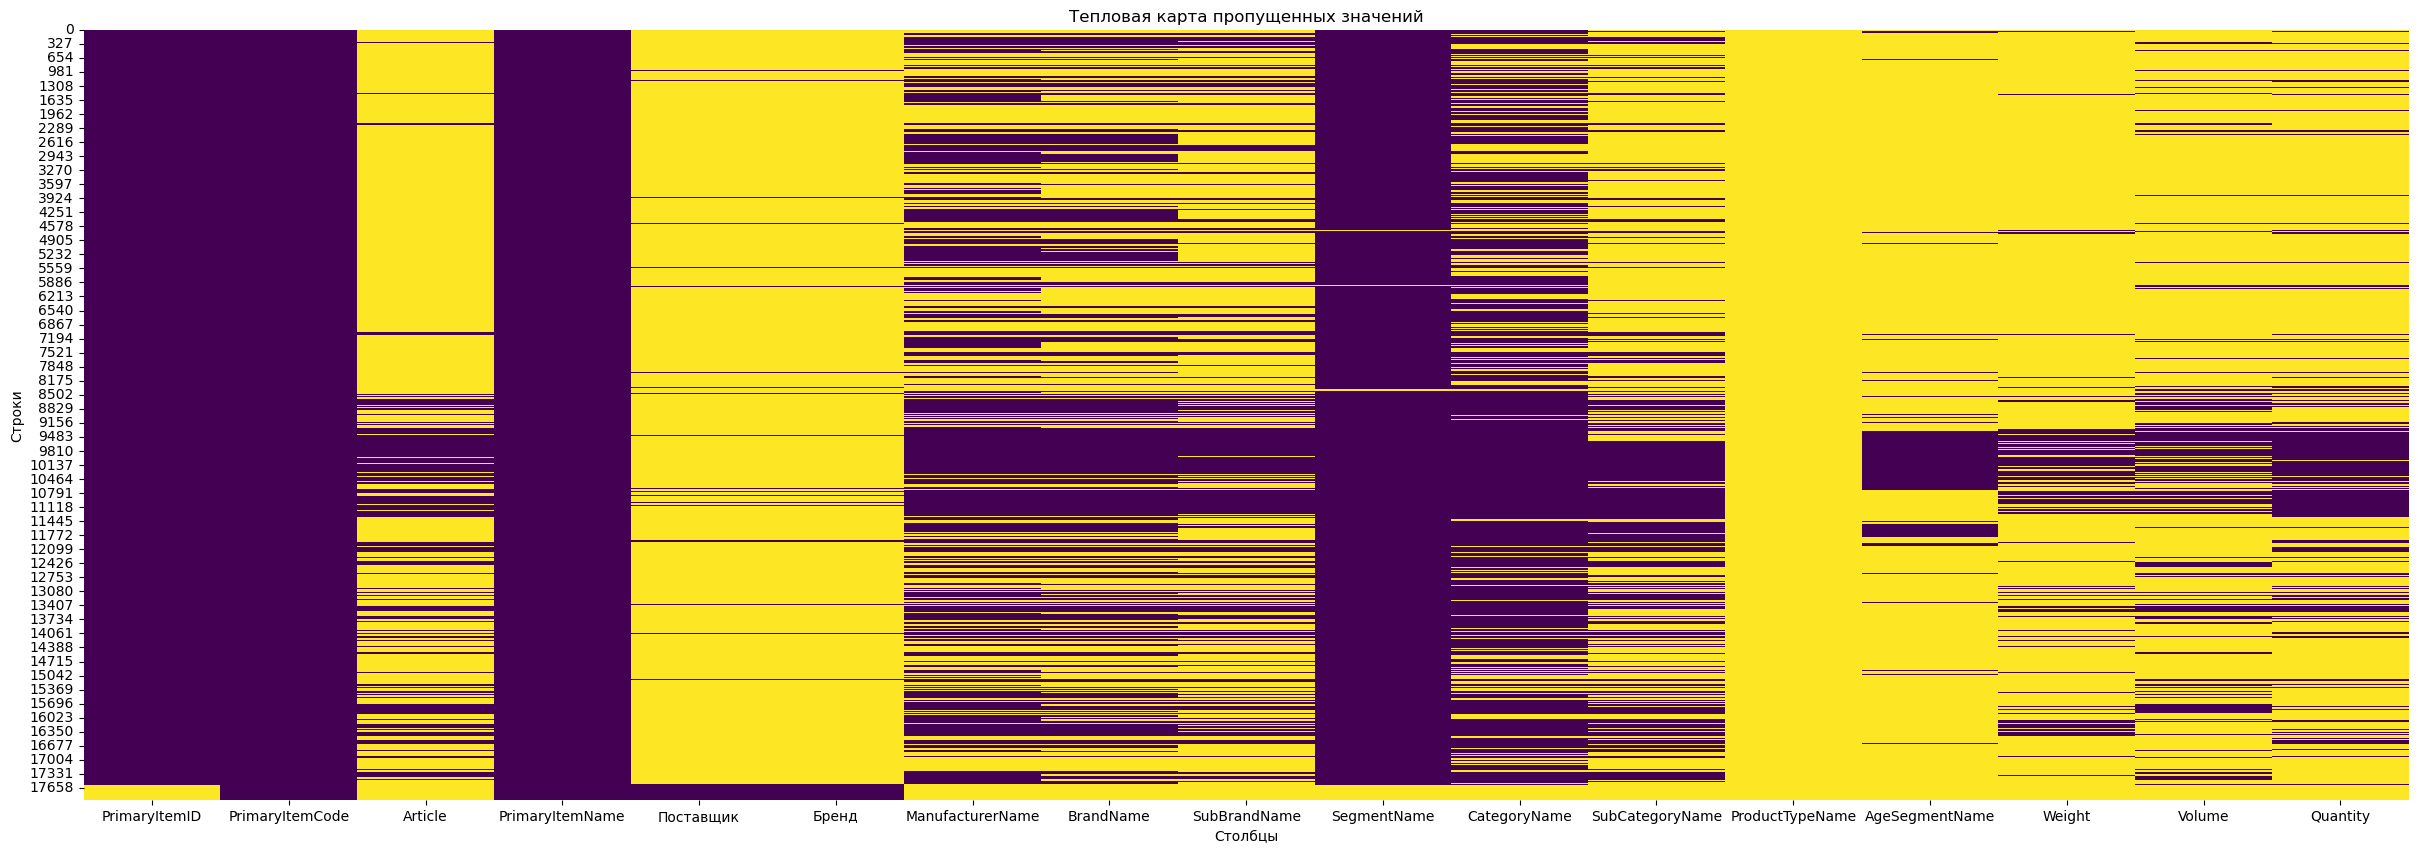

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30, 10))  
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Тепловая карта пропущенных значений')
plt.xlabel('Столбцы')
plt.ylabel('Строки')
plt.show()


In [69]:
df = df.drop(['PrimaryItemID','PrimaryItemCode','Article','ProductTypeName'],axis=1)
for column in df.columns:
    df[column] = df[column].astype('object')
df.head()

,PrimaryItemName,Поставщик,Бренд,ManufacturerName,BrandName,SubBrandName,SegmentName,CategoryName,SubCategoryName,AgeSegmentName,Weight,Volume,Quantity
0,З/П РОМАШКИН ЛУГ УГОЛЬ СЕРЕБРО 100МЛ,NaN,NaN,NaN,NaN,NaN,Oral care,Зубная паста,NaN,Для детей,NaN,NaN,NaN
1,З/П РОМАШКИН ЛУГ ЦЕЛЕБНЫЕ ТРАВЫ 100МЛ,NaN,NaN,NaN,NaN,NaN,Oral care,Зубная паста,NaN,Для детей,NaN,NaN,NaN
2,З/Щ SILCAMED СРЕД ТРОЙНОЕ ДЕЙСТВИЕ,NaN,NaN,DENTAL KOSMETIK,SILCAMED,NaN,Oral care,Зубные щетки,Мануальные,NaN,NaN,NaN,NaN
3,БОС ЖИДКИЙ1200МЛ.ОТБ ЖМС,NaN,NaN,AIST/SPB,NaN,NaN,Home care,LAUNDRY,NaN,NaN,NaN,NaN,NaN
4,&.АМП.Бумага для выпечки 6м,NaN,NaN,NaN,NaN,NaN,Home care,OTHERS,NaN,NaN,NaN,NaN,NaN


In [70]:
columns_to_combne = df.drop(['SegmentName','Volume','Weight','Quantity'],axis=1).columns
df['combined_text'] = df[columns_to_combne].fillna('').agg(', '.join, axis=1)
df = df.drop(columns_to_combne,axis=1)
df.head()

,SegmentName,Weight,Volume,Quantity,combined_text
0,Oral care,NaN,NaN,NaN,"З/П РОМАШКИН ЛУГ УГОЛЬ СЕРЕБРО 100МЛ, , , , ,..."
1,Oral care,NaN,NaN,NaN,"З/П РОМАШКИН ЛУГ ЦЕЛЕБНЫЕ ТРАВЫ 100МЛ, , , , ..."
2,Oral care,NaN,NaN,NaN,"З/Щ SILCAMED СРЕД ТРОЙНОЕ ДЕЙСТВИЕ, , , DENTA..."
3,Home care,NaN,NaN,NaN,"БОС ЖИДКИЙ1200МЛ.ОТБ ЖМС, , , AIST/SPB, , , LA..."
4,Home care,NaN,NaN,NaN,"&.АМП.Бумага для выпечки 6м, , , , , , OTHERS, ,"


In [72]:
df = df.drop(['Weight','Volume','Quantity'],axis=1)

In [73]:
df.head()

,SegmentName,combined_text
0,Oral care,"З/П РОМАШКИН ЛУГ УГОЛЬ СЕРЕБРО 100МЛ, , , , ,..."
1,Oral care,"З/П РОМАШКИН ЛУГ ЦЕЛЕБНЫЕ ТРАВЫ 100МЛ, , , , ..."
2,Oral care,"З/Щ SILCAMED СРЕД ТРОЙНОЕ ДЕЙСТВИЕ, , , DENTA..."
3,Home care,"БОС ЖИДКИЙ1200МЛ.ОТБ ЖМС, , , AIST/SPB, , , LA..."
4,Home care,"&.АМП.Бумага для выпечки 6м, , , , , , OTHERS, ,"


In [74]:
from transformers import DistilBertTokenizer, DistilBertModel
import torch
import pandas as pd

from transformers import BertTokenizer, BertModel

model_name = "bert-base-multilingual-cased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

c:\Users\Dmitriy.Burnashev\AppData\Local\anaconda3\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [75]:
from tqdm import tqdm

def get_embeddings(texts, batch_size):
    embeddings_list = []
    model.eval()  
    for i in tqdm(range(0, len(texts), batch_size), desc="Processing batches"):
        batch_texts = texts[i:i+batch_size]
        inputs = tokenizer(batch_texts, padding=True, truncation=True, return_tensors="pt")
        
        inputs = {key: value.to(model.device) for key, value in inputs.items()}
        
        with torch.no_grad():
            outputs = model(**inputs)

            batch_embeddings = outputs.last_hidden_state.mean(dim=1)
            embeddings_list.extend(batch_embeddings.cpu().numpy().tolist())
    
    return embeddings_list


In [ ]:
#descriptions = df['combined_text'].tolist()
#embeddings = get_embeddings(descriptions, 2048)

In [78]:
splat_embeddings = np.load("splat_embeddings.npy")

In [79]:
col = [f'{i+1}_feature' for i in range(splat_embeddings.shape[1])]

df_body = pd.DataFrame(splat_embeddings, columns=col)

df = pd.concat([df, df_body], axis=1)

In [81]:
df = df.drop('combined_text',axis=1)

In [87]:
df = df[~df['SegmentName'].isna()]

In [88]:
bdf = BaseDatasetTransform(df,target='SegmentName')
X_train, X_test, y_train, y_test,categorical_features = bdf.fit_transform()

Series([], dtype: int64)

В колонке(ах) ['SegmentName'] нет пропущенных значений
В наборе данных нет пропущенных значений
-------------------------------------------
Информация о колонках в датасете

Категориальные колонки:
Index([], dtype='object')

Числовые колонки:
Index(['1_feature', '2_feature', '3_feature', '4_feature', '5_feature',
       '6_feature', '7_feature', '8_feature', '9_feature', '10_feature',
       ...
       '759_feature', '760_feature', '761_feature', '762_feature',
       '763_feature', '764_feature', '765_feature', '766_feature',
       '767_feature', '768_feature'],
      dtype='object', length=768)


In [89]:
lgbm_model = lgb.LGBMClassifier(verbose=-1)

columns_to_delete = []  

unique_classes = len(set(y_train))
print(unique_classes)

model_train = BaseModelTrain(
    model=lgbm_model,
    columns_to_delete=columns_to_delete,
    categorical_features=categorical_features,
    boosting_type='gbdt',
    objective='multiclass',  
    num_class=unique_classes, 
    metric='multi_error' 
)

1


In [90]:
metrics = ['accuracy', 'precision', 'recall', 'f1_macro']
evaluator = ModelEvaluator(model_trainer=model_train, metrics=metrics)

evaluator.fit(X_train, y_train)

c:\Users\Dmitriy.Burnashev\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dmitriy.Burnashev\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


ModelEvaluator(metrics=['accuracy', 'precision', 'recall', 'f1_macro'],
               model_trainer=BaseModelTrain(categorical_features=[],
                                            columns_to_delete=[],
                                            model=LGBMClassifier(metric='multi_error',
                                                                 num_class=1,
                                                                 objective='multiclass',
                                                                 verbose=-1)))

In [91]:
evaluator.evaluate_to_dataframe(X_test, y_test)

,Metric,Score
0,accuracy,0.914427
1,precision,0.913345
2,recall,0.786639
3,f1,0.825841
